# Notebook for ModelFlow 
## Update system path

In [5]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

## Import dependency

In [6]:
from dotenv import load_dotenv
from IPython.display import display

from uniflow.client import Client
from uniflow.flow.flow_factory import FlowFactory
from uniflow.viz import Viz

load_dotenv()

True

In [7]:
FlowFactory.list()

['LinearFlow',
 'ModelFlow',
 'OpenAIJsonModelFlow',
 'DataGenFlow',
 'DataGenTextFlow',
 'TextPlusDataGenFlow',
 'SelfInstructedGenFlow',
 'PDFSelfInstructedGenFlow']

## Run model flow to generate data

In [8]:
data = [{
    "instruction": """Generate one question and its corresponding answer based on the context. Following the format of the examples below to include context, question, and answer in the response.""",
    "examples": [
        {
            "context": """The quick brown fox jumps over the lazy dog.""",
            "question": """What is the color of the fox?""",
            "answer": """brown."""
        },
        {
            "context": """The quick brown fox jumps over the lazy black dog.""",
            "question": """What is the color of the dog?""",
            "answer": """black."""
        },
        {
            "context": """It was a sunny day and the sky color is blue.""",
            "question": """""",
            "answer": """""",
        }
    ],
},
        {
    "instruction": """Generate one question and its corresponding answer based on the context. Following the format of the examples below to include context, question, and answer in the response.""",
    "examples": [
        {
            "context": """The quick brown fox jumps over the lazy dog.""",
            "question": """What is the color of the fox?""",
            "answer": """brown."""
        },
        {
            "context": """The quick brown fox jumps over the lazy black dog.""",
            "question": """What is the color of the dog?""",
            "answer": """black."""
        },
        {
            "context": """My name is bobby and I am a talent software engineer working on AI/ML.""",
            "question": """""",
            "answer": """""",
        }
    ],
}]


In [9]:
client = Client("ModelFlow")

In [10]:
output = client.run(data)

In [11]:
output

[{'output': [[{'context': 'It was a sunny day and the sky color is blue.',
     'question': 'What is the color of the sky?',
     'answer': 'blue.'},
    {'context': 'It was a sunny day and the sky color is blue.',
     'question': 'What color was the sky on that sunny day?',
     'answer': 'blue.'},
    {'context': 'It was a sunny day and the sky color is blue.',
     'question': 'What color was the sky?',
     'answer': 'blue.'}]],
  'root': <uniflow.node.node.Node at 0x2860d60b0>},
 {'output': [[{'context': 'My name is bobby and I am a talented software engineer working on AI/ML.',
     'question': "What is Bobby's profession?",
     'answer': 'software engineer working on AI/ML.'},
    {'context': 'My name is bobby and I am a talented software engineer working on AI/ML.',
     'question': 'What type of software engineer is Bobby?',
     'answer': 'talented software engineer.'},
    {'context': 'My name is bobby and I am a talented software engineer working on AI/ML.',
     'questio

## Plot model flow graph

In [12]:
graph = Viz.to_digraph(output[0]['root'])

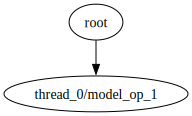

In [13]:
display(graph)

In [14]:
graph = Viz.to_digraph(output[1]['root'])

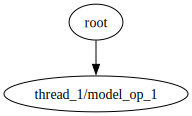

In [15]:
display(graph)